[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/096_ml_unsupervised/096_ml_unsupervised.ipynb)

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
# el aprendizaje no supervisado se refiere al proceso de encontrar patrones o estructuras ocultas en los datos sin la ayuda de etiquetas, mientras
#que K-Means es un algoritmo específico dentro de esta categoría que se utiliza para agrupar datos en clusters basados en su similitud.


# centroides de los clústeres (8 puntos)
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3],
     [ 2.0,  3.5],
     [ 1.8,  2.5],
     [ 2.5,  1.8]]) # Agregaciones

# usare la desviacion etandar  ..... de 0.1 para agruparlas mejor y esten mas cerca del centro
blob_std = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
  # Ajustado para 8 puntos

# Generar datos sintéticos con 5000 ejemplos y 8 grupos
#posdata ya esta en sus grupos 7u7
X, y = make_blobs(n_samples=5000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [ ]:
print(X.shape)
print(y.shape)

(5000, 2)
(5000,)


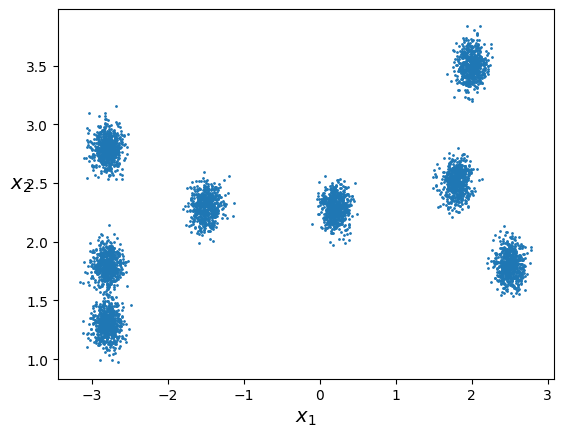

<Figure size 800x400 with 0 Axes>

In [ ]:
# ya que estn agrupados los muestro
import matplotlib.pyplot as plt

def plot_clusters(X, y=None): #toma los datos x,y
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

    plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

En *Scikit-Learn* puedes usar el objeto [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), indicando el número de clusters deseado.  

In [ ]:
from sklearn.cluster import KMeans
#Aplicando kaenas para la division
k = 8 # ocho clustrring a encontrar
kmeans = KMeans(n_clusters=k, random_state=42)#se crea el objeto kameans raiz en 42 para garantizar la consistencia
y_pred = kmeans.fit_predict(X) # se aplica kameans a los datos x para saber a cual clustering pertence
y_pred# almacena  los datos x y que clastering pertence

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 5, 0, ..., 7, 6, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_  #visualizar los centroides  de los clustering en espacio bidimensional

array([[ 0.20510466,  2.29026429],
       [-2.79985875,  2.79508897],
       [ 1.80002487,  2.50554299],
       [-2.79928277,  1.29584636],
       [-1.50507708,  2.30157921],
       [ 2.50115698,  1.80277467],
       [ 1.99760638,  3.50064281],
       [-2.80240572,  1.79887388]])

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]]) #ejemplo meto datos para saber a cual clastering pertenece
kmeans.predict(X_new)

array([0, 5, 1, 1], dtype=int32)

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'): #trazo los centroides en la grafica
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]#busca los centroides de los cluster mas grandes
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,               #resalta los centroides con mas contribucion de clastering
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, #traza las decision del algoritmo tomas los clustering x
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),  #traza las areas de diferentes colores
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

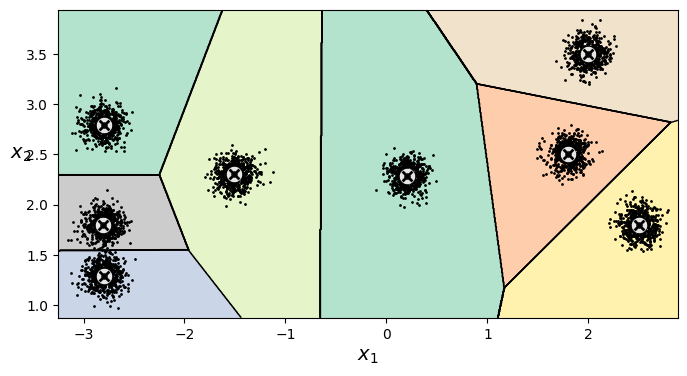

In [ ]:
plt.figure(figsize=(8, 4)) #genera la grafica de 8 pulgadas de  de acnho y 4 alto
plot_decision_boundaries(kmeans, X) # calcula y traza los limites
plt.show()

In [ ]:
kmeans.transform(X_new)  #ejemplo para ver cuán lejos están los puntos de X_new de cada centroide de los clusters

array([[0.35541705, 2.91056275, 1.86966929, 2.88648859, 1.53499415,
        2.50892089, 2.49847155, 2.80961377],
       [2.80992763, 5.85410352, 1.30211905, 5.84187581, 4.51515997,
        0.53641606, 1.80463897, 5.80589045],
       [3.28274591, 0.28643507, 4.825425  , 1.71593328, 1.6500261 ,
        5.62992687, 5.02262011, 1.21727049],
       [3.21195968, 0.35655858, 4.80002807, 1.22076754, 1.5080336 ,
        5.54516467, 5.09679856, 0.7284376 ]])

In [ ]:
kmeans_iter1 = KMeans(n_clusters=8, init="random", n_init=1,         #ajuste mediante cuantas iteraciones se ase
                     algorithm="full", max_iter=1, random_state=1)   # para ver como  varia la formacion xd los cluster
kmeans_iter2 = KMeans(n_clusters=8, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)   # en funcion de la presicion
kmeans_iter3 = KMeans(n_clusters=8, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X) # 1 iteracion
kmeans_iter2.fit(X)  #2 iteracion
kmeans_iter3.fit(X)   # 3 iteracion

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', max_iter=3, n_init=1, random_state=1)

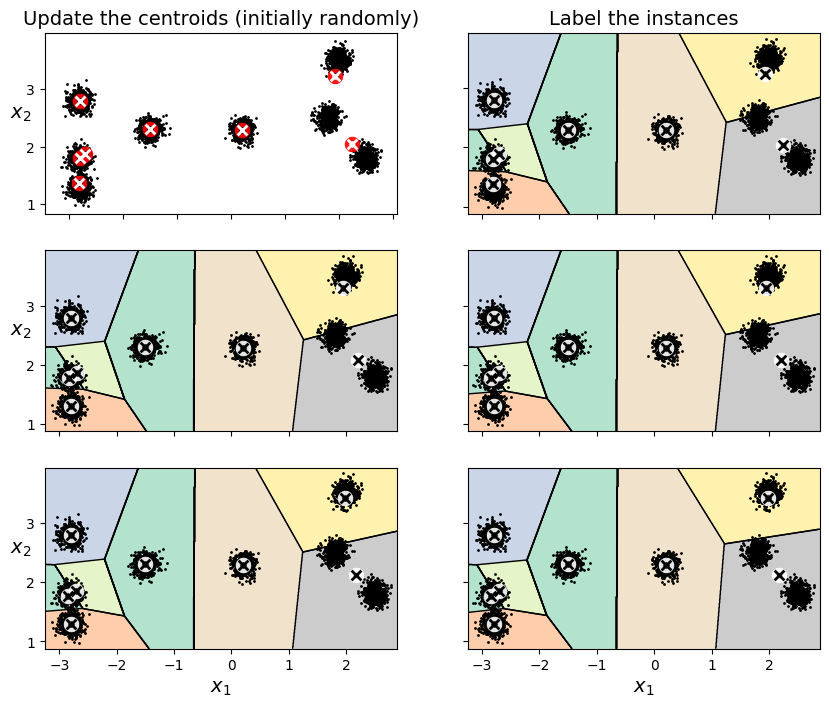

In [ ]:
plt.figure(figsize=(10, 8)) # figura 10 x8

plt.subplot(321) # subcuadros
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()# muestra los centroides clustering y fronteras

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None): #ajuste me diante comparaion de 2 clustering
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)
# esta función ajusta dos modelos de clustering a los datos de entrada y visualiza sus límites de decisión
#en dos subgráficos diferentes, cada uno con su propio título opcional.
# La función plot_decision_boundaries se utiliza para trazar los límites de decisión de cada modelo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


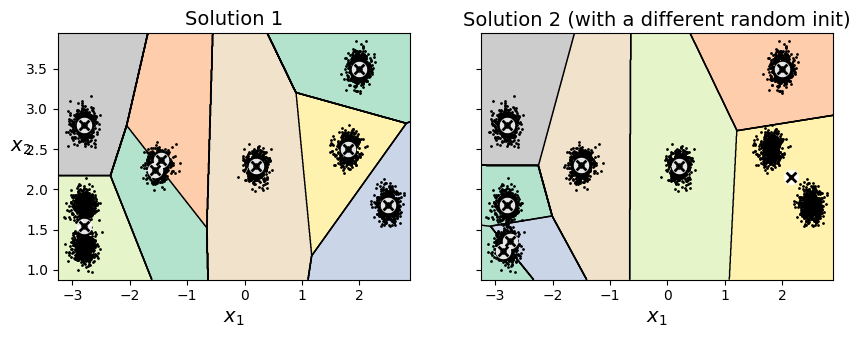

In [ ]:
kmeans_rnd_init1 = KMeans(n_clusters=8, init="random", n_init=1,  #otra manera pero esta ves con diferentes semillas
                         algorithm="full", random_state=11)       # para ver si la consistencia si tienes ?? :V
kmeans_rnd_init2 = KMeans(n_clusters=8, init="random", n_init=1,
                         algorithm="full", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

In [ ]:
# crea y ajusta un modelo KMeans que utiliza 10 inicializaciones
#aleatorias independientes para encontrar una solución de clustering óptima en los datos X.

kmeans_rnd_10_inits = KMeans(n_clusters=8, init="random", n_init=10,
                              algorithm="full", random_state=11)   #con 10 semillas diferentes para comprobar  que me los resultados mismos
kmeans_rnd_10_inits.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', n_init=10, random_state=11)

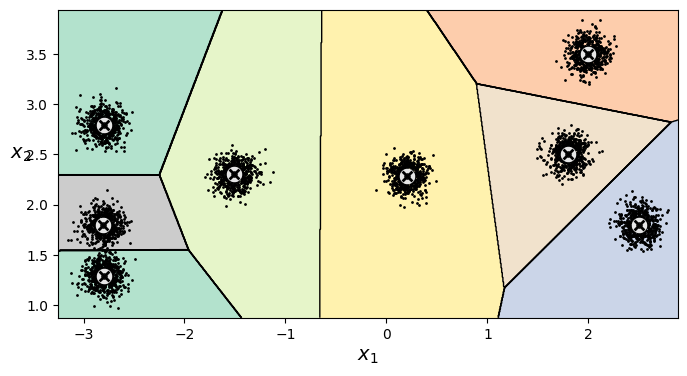

In [ ]:
# me muestra
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X) #gafico y miro los limites de decision o algo asi
plt.show()

In [ ]:
#usaremos un kameans acelerado
from sklearn.datasets import fetch_openml# cargar datos para usar minibatch
import numpy as np
mnist = fetch_openml('Kuzushiji-MNIST', version=1) #descargar el data set y lo guarda en mnis
mnist.target = mnist.target.astype(np.int64)#conbierte las etiquetas a numeros para consistencia

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(   #divide en datos de entrenamiento y prueba
    mnist["data"], mnist["target"], random_state=42)

In [ ]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]#selecciona el tamaño de lote de datos x evitar el sobreajuste

In [ ]:
from sklearn.cluster import MiniBatchKMeans #mediante minibach acelerador de ajuste

k = 8  #numreo de clastering
n_init = 10 #numero de inializaciones aletorias
n_iterations = 100 #numero de iteraciones
batch_size = 100   #tamaño de bacht
init_size = 500  #tamaño de inicializacion
evaluate_on_last_n_iters = 10  #numero de iteraciones a evaluar

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size) #carga un lote incial y ajusta el modelo
    X_init = load_next_batch(init_size)                              #itera sobre el numero de inicalizaciones aletorias
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0 # realiza el seguimiento de la inercias y su suma en las
    for iteration in range(n_iterations):  # ultimas iteraciones  evaluate para la estabilidad
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters: #las inercias ayudan a ver cuan bien estana grupados los datos
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):  #modelos con la menor inercia acumulada
        best_kmeans = minibatch_kmeans

        #inercia mide q tn compactos estan estan los clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

In [ ]:
best_kmeans.score(X)  #razonable  por q se aserca al cero es decir evalua la calidad de los clustering


# en conclusion el minibacth k means es mas rapido pero su precision suele ser peor

-98.12840171156932

In [ ]:
from sklearn.metrics import silhouette_score #se tuiliza silueta para ver q tan bien se agrupn
silhouette_score(X, kmeans.labels_)  #-1 mal agrupado al claster y 1 bueno :V 0 serca de la frontera

0.7937691813897484

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

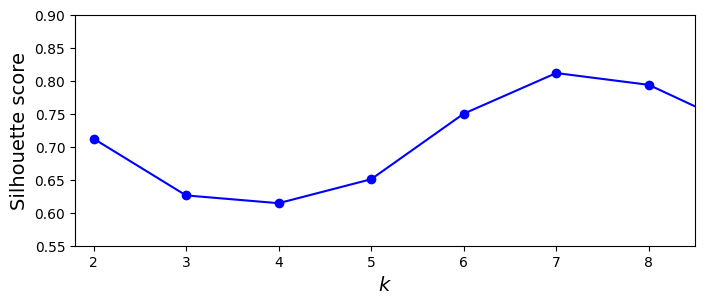

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]   #crear modelos kamenas ajustados  para diferentes valores de k entre 1 y 9 clastering

silhouette_scores = [silhouette_score(X, model.labels_)#calcula el coeficiente de silueta
                     for model in kmeans_per_k[1:]] #proporciona una medida cuan bin esta separad los clustering
  #esto ayuda a ver el numero optimo de cluste
plt.figure(figsize=(8, 3)) #traza una figura
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.9]) #establece los limitez de los ejes
plt.show()

#significado de los clusteng necesaros
#uso silueta para ver q tan bien se ajusta un punto a su cluster

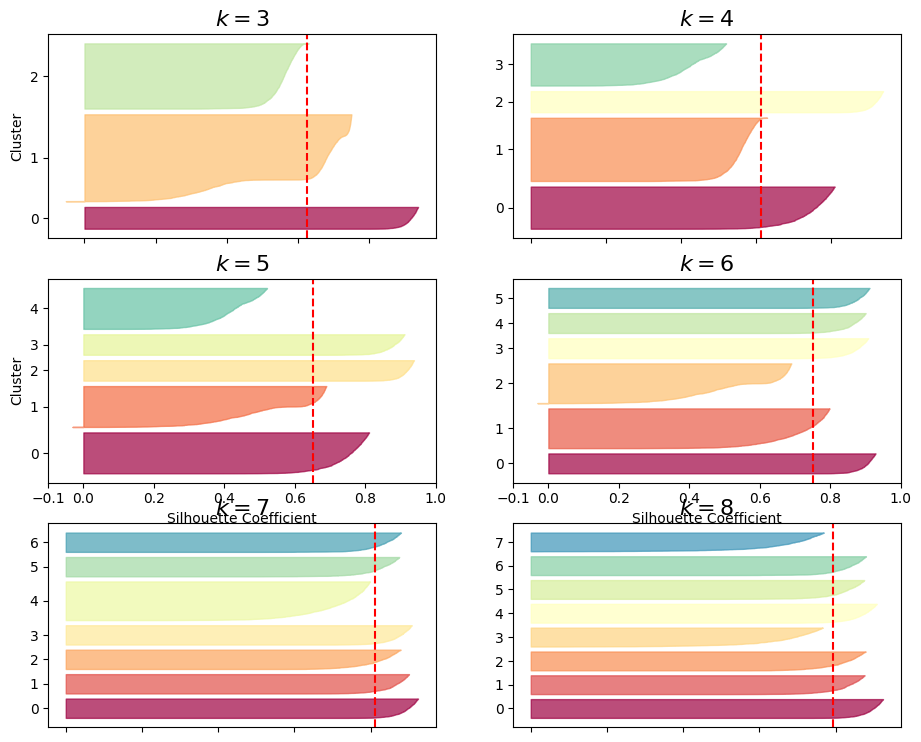

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9)) #tamaño de la figura

for k in (3, 4, 5, 6, 7,8): #para cada valor de k
    plt.subplot(3, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_   #contiene las etiquetas
    silhouette_coefficients = silhouette_samples(X, y_pred)  #contiene la silueta

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):    #crea los claster y su sombras para ver la represnetacion
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6,):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()
#evaluo la calidad de clustering